# 1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_0$ is distributed as $N(0,1)$
    * $x_1$ is distributed as $x_0+N(0,3)$
    * $x_2$ is given by $2x_0+x_1$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import math
import scipy.stats
import pandas as pd
from scipy import stats
from scipy import fftpack
from scipy import linalg as la

##### Dataset

In [2]:
dim_set=1000
x0 = np.random.normal(0, 1, dim_set)
x1 = x0 + np.random.normal(0, 3, dim_set)
x2 = 2*x0 + x1

data=np.array((x0,x1,x2))
data

array([[-1.00807712, -2.50261093,  2.03440945, ..., -0.79886861,
         0.04083806, -0.2319004 ],
       [-1.80579889,  0.44345451,  4.06804145, ..., -2.04508145,
         2.95323451, -3.27428339],
       [-3.82195313, -4.56176735,  8.13686035, ..., -3.64281867,
         3.03491063, -3.73808419]])

##### With covariance matrix

In [3]:
cov_data= np.cov(data)
l, V = la.eig(cov_data)
l = np.real_if_close(l)
V =np.real_if_close(V)

print("Eigenvalues= \n", l)
print("\nEigenvectors= \n", V)
print("\nCovariance matrix= \n",cov_data)


Eigenvalues= 
 [2.66722700e+01 3.91813223e-16 2.01990579e+00]

Eigenvectors= 
 [[-0.12703263 -0.81649658  0.5632016 ]
 [-0.56274565 -0.40824829 -0.71878416]
 [-0.8168109   0.40824829  0.40761904]]

Covariance matrix= 
 [[ 1.07112424  1.08902305  3.23127153]
 [ 1.08902305  9.49023121 11.66827732]
 [ 3.23127153 11.66827732 18.13082037]]


##### With SVD

In [4]:
U, D, Vt = la.svd(data)

eig= D**2/(dim_set-1)
print("Eigenvalues: ", eig)
print("\nU: ", U)
print("\nV: ", Vt)


Eigenvalues:  [2.66762069e+01 2.02005214e+00 1.10218793e-31]

U:  [[-0.12704997  0.56319769 -0.81649658]
 [-0.56272352 -0.71880149 -0.40824829]
 [-0.81682345  0.4075939   0.40824829]]

V:  [[ 2.61328343e-02  2.32443881e-02 -5.63198197e-02 ...  2.58985189e-02
  -2.53973011e-02  3.01710835e-02]
 [-1.84215109e-02 -7.98612727e-02  3.42410746e-02 ... -1.03445691e-02
  -1.92059251e-02  1.55675554e-02]
 [-8.48171873e-01 -8.72708877e-02 -1.16752759e-03 ... -2.50239425e-03
   2.78266844e-04  1.22254080e-02]
 ...
 [-1.05283177e-02  1.25362924e-02  1.81877104e-02 ...  9.99295777e-01
   4.22694659e-04 -7.83380083e-04]
 [ 3.86566011e-03 -3.15199645e-02 -8.89863266e-04 ...  5.00004559e-04
   9.99016235e-01  1.04681787e-03]
 [ 5.16668504e-03  3.35763073e-02  1.76512093e-02 ... -5.87640668e-04
   1.01549288e-03  9.98687029e-01]]


The two methods show the same result even though the order of the eigenvalues and of the correspondent eigenvectors is different

##### Variability

In [33]:
percentages = eig/np.sum(eig)
print(percentages*100, " %")

[9.29605732e+01 7.03942677e+00 3.84087672e-31]  %


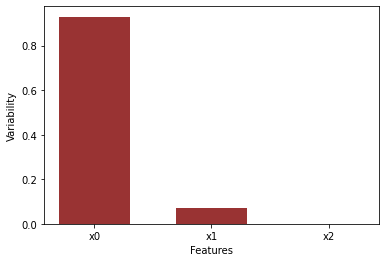

In [18]:
features= ["x%u"%a for a in range(0,len(percentages))]

plt.bar(features, percentages, color ='maroon', width = 0.6, alpha=0.8)
 
plt.xlabel("Features")
plt.ylabel("Variability")
plt.show()

The set of data has a non zero variability along two direction, while the variability on the direction given by the third eigenvector can be neglected. This makes sense since two of the coordinates of the data had a random component and have a small correlation, while the third one is a function of the other two. 
From the PCA it is so possible to see that neglecting the third component almost all the variability is retained, certainly more than 90%

In [6]:
data_rotated = np.dot(U.T, data)
print(data_rotated)

[[ 4.26610261e+00  3.79457289e+00 -9.19403259e+00 ...  4.22785137e+00
  -4.14602915e+00  4.92533403e+00]
 [-8.27540548e-01 -3.58756899e+00  1.53819509e+00 ... -4.64704029e-01
  -8.62778404e-01  6.99333697e-01]
 [ 8.88178420e-16  3.10862447e-15 -2.22044605e-15 ...  8.88178420e-16
   4.44089210e-16 -2.22044605e-16]]


##### Plots

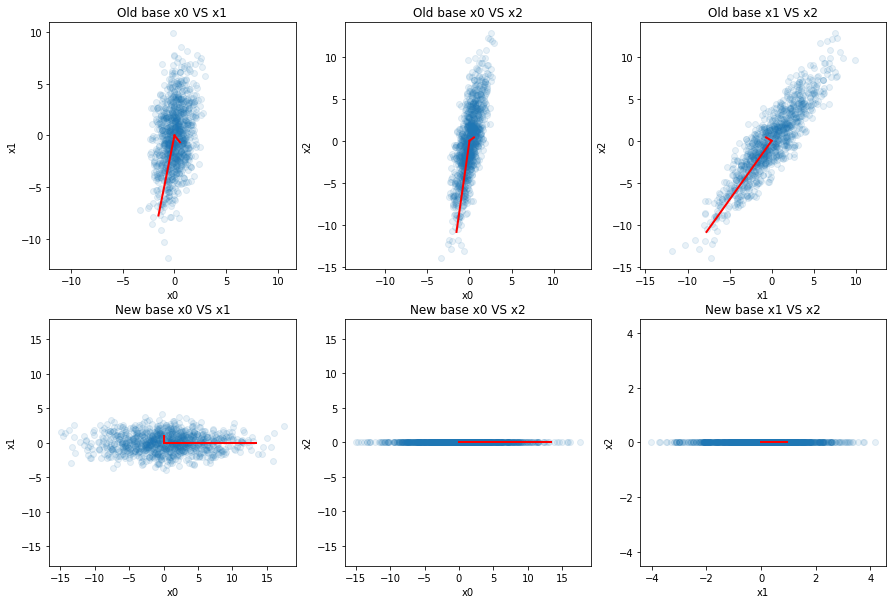

In [23]:
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

def plot_graph(ax,r,c, dati, x1, x2):
    ax[r,c].scatter(dati[x1],dati[x2], alpha=0.1)
    ax[r,c].set_xlabel('x'+str(x1))  
    ax[r,c].set_ylabel('x'+str(x2)) 
    if r==0:
        for li, vi in zip(eig, U.T):
            ax[r,c].axis("equal")
            ax[r,c].plot([0, 0.5 *  li*vi[x1]], [0, 0.5 * li* vi[x2]], 'r-', lw=2)
            ax[r,c].set_title("Old base x"+str(x1)+" VS x"+str(x2) )
    if r==1: 
        for li, vi in zip(eig, np.diag([1]*len(l))):  #matrice ortogonale
            ax[r,c].axis("equal")
            ax[r,c].plot([0, 0.5 * li * vi[x1]], [0, 0.5 * li * vi[x2]], 'r-', lw=2)
            ax[r,c].set_title("New base x"+str(x1)+" VS x"+str(x2) )
    
plot_graph(ax,0,0,data,0,1)
plot_graph(ax,0,1,data,0,2)
plot_graph(ax,0,2,data,1,2)
plot_graph(ax,1,0,data_rotated ,0,1)
plot_graph(ax,1,1,data_rotated ,0,2)
plot_graph(ax,1,2,data_rotated ,1,2)

<IPython.core.display.Javascript object>


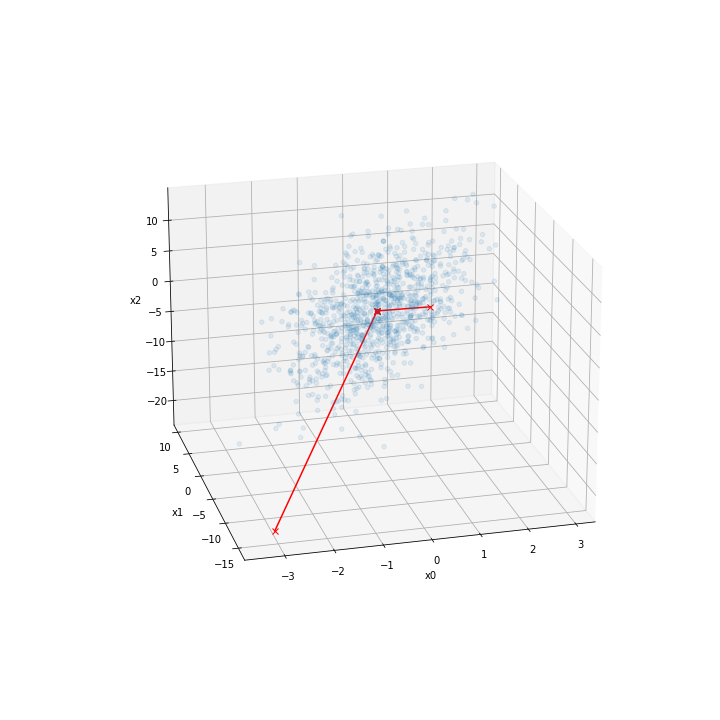

In [28]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[0],data[1],data[2], alpha=0.1)
#ax.scatter(data_rotated[0],data_rotated[1],data_rotated[2], alpha=0.1)

ax.scatter(0,0,0, c="red")

for i in (0,1,2):
    ax.plot([0,U.T[i,0]*eig[i]],[0,U.T[i,1]*eig[i]],[0,U.T[i,2]*eig[i]], c="red", marker="x")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("x2")


#ax.plot([0,0],[0,0],[0,1*2], c="red", marker="x")
#ax.plot([0,1*2],[0,0],[0,0], c="red", marker="x")
#ax.plot([0,0],[0,1*2],[0,0], c="red", marker="x")



plt.show()

# 2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [19]:
new_var= [np.random.normal(0, 1/20, dim_set) for i in range(0,10)]
data2=np.array([*(x0,x1,x2),*new_var])
data2

array([[-1.00807712, -2.50261093,  2.03440945, ..., -0.79886861,
         0.04083806, -0.2319004 ],
       [-1.80579889,  0.44345451,  4.06804145, ..., -2.04508145,
         2.95323451, -3.27428339],
       [-3.82195313, -4.56176735,  8.13686035, ..., -3.64281867,
         3.03491063, -3.73808419],
       ...,
       [-0.01042358,  0.01057876,  0.04861432, ...,  0.05232315,
         0.07607675, -0.01709376],
       [-0.04577791, -0.07520213, -0.05269089, ...,  0.05715179,
         0.05126029,  0.02509341],
       [-0.03154239, -0.02991043,  0.00890791, ..., -0.04916793,
         0.01029592,  0.0162841 ]])

In [20]:
U2, D2, Vt2 = la.svd(data2)

eig2= D2**2/(dim_set-1)
print("Eigenvalues: ", eig2)
print("\nU: ", U2)
print("\nV: ", Vt2)



Eigenvalues:  [2.66762359e+01 2.02007134e+00 3.04392631e-03 2.80623515e-03
 2.67766995e-03 2.61680823e-03 2.58117575e-03 2.48387315e-03
 2.32671937e-03 2.28760658e-03 2.20955912e-03 2.15399842e-03
 8.25545546e-31]

U:  [[-1.27049892e-01  5.63195029e-01 -8.60453284e-04  6.95179434e-04
  -2.24790854e-04  6.09503184e-04 -7.91917623e-05  3.07330656e-04
  -3.13814038e-04  1.37651231e-04  5.93740107e-04 -8.95295223e-04
  -8.16496581e-01]
 [-5.62723219e-01 -7.18797992e-01  8.12597263e-04 -1.22559357e-03
   1.71766589e-04 -6.13697179e-04  1.41228459e-04 -7.00333260e-04
   2.79231553e-04 -6.00574426e-04 -9.11382229e-04  1.00483119e-03
  -4.08248290e-01]
 [-8.16823003e-01  4.07592065e-01 -9.08309305e-04  1.64765298e-04
  -2.77815119e-04  6.05309189e-04 -1.71550657e-05 -8.56719472e-05
  -3.48396523e-04 -3.25271964e-04  2.76097986e-04 -7.85759256e-04
   4.08248290e-01]
 [-1.64492370e-04  8.40980961e-04  7.57820839e-02 -1.22678620e-01
   6.52372441e-01 -6.31901824e-01  2.13280128e-02  7.76806260e-0

In [21]:
percentages2 = eig2/np.sum(eig2)
print(percentages2*100, " %")

[9.28789956e+01 7.03330850e+00 1.05980776e-02 9.77050522e-03
 9.32287811e-03 9.11097506e-03 8.98691299e-03 8.64813329e-03
 8.10096895e-03 7.96478941e-03 7.69305059e-03 7.49960417e-03
 2.87431261e-30]  %


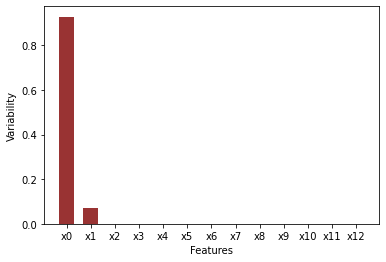

In [26]:
features2= ["x%u"%a for a in range(0,len(percentages2))]

plt.bar(features2, percentages2, color ='maroon', width = 0.6, alpha=0.8)
 
plt.xlabel("Features")
plt.ylabel("Variability")
plt.show()

Also in this case, after adding 10 features normally distributed, the result is similar to the previous one, since all these features have the same mean value and same variance, so they reresent the same sample. Reducing so the dimensionality from 13 to 2 allows to retain also in this case more than 99% of the variability.

In [27]:
data_rotated2 = np.dot(U2.T, data2)
print(data_rotated2)

[[ 4.26608694e+00  3.79453322e+00 -9.19404520e+00 ...  4.22788223e+00
  -4.14594487e+00  4.92539307e+00]
 [-8.27833417e-01 -3.58758863e+00  1.53819542e+00 ... -4.64946386e-01
  -8.63033052e-01  6.99297187e-01]
 [-7.94372580e-03  3.09716285e-02  3.98102551e-02 ... -7.71294658e-02
  -1.09160299e-01 -2.88720660e-02]
 ...
 [ 1.48646073e-02 -2.23153500e-02  4.75287180e-02 ...  6.50023422e-03
   4.06057124e-02  5.96496896e-02]
 [-4.49549517e-02 -2.33331801e-02 -2.57853648e-02 ... -6.09044102e-02
   4.55685691e-02 -1.29957762e-04]
 [-3.97129532e-16 -2.30773328e-15  4.34841125e-16 ...  2.18399836e-16
  -1.03218444e-15  1.17835863e-15]]


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data?dl=1'
data = pd.read_csv(url, header=None)

data = data[data[10]=="g"]
data=data.drop(data.columns[10], axis=1)

data

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090


In [19]:
data2=np.array(data.values.tolist()).T
U, D, Vt = la.svd(data2)

dim_set=len(data.index)
eig= D**2/(dim_set-1)

print("Eigenvalues: ", eig)
print("\nU: ", U)
print("\nV: ", Vt)


Eigenvalues:  [4.43093756e+04 1.70098497e+03 1.13281496e+03 5.39824712e+02
 2.98430670e+02 1.83691519e+02 4.21920805e+01 3.17764138e-01
 2.12490200e-02 3.41584285e-04]

U:  [[-2.23372019e-01 -8.35657142e-02 -3.61318225e-01 -4.13512875e-02
   8.49970372e-01  2.39271803e-02 -2.96346443e-01 -2.53752260e-03
   3.33488190e-03  7.17751247e-05]
 [-8.95328687e-02 -4.69724115e-02 -5.81232446e-02 -8.56136365e-02
   2.74171236e-01 -2.28089991e-02  9.48735006e-01 -5.45242113e-02
   1.75557025e-02  3.62421994e-04]
 [-1.28147991e-02 -4.56349575e-03  2.57945127e-03 -1.55700603e-02
   1.85670880e-02 -2.54781241e-04  5.21153730e-02  9.66384207e-01
  -2.50118976e-01 -6.86459029e-03]
 [-1.58926016e-03  5.36056184e-04  4.31132034e-03 -5.02693516e-03
  -2.33946765e-03  7.85598567e-05 -2.62664057e-03  2.18317488e-01
   8.29095759e-01  5.14663626e-01]
 [-8.90463259e-04  3.24832865e-04  2.44779837e-03 -2.84204802e-03
  -1.38157225e-03  4.01608552e-05 -1.60767181e-03  1.23293819e-01
   4.99705002e-01 -8.573646

In [20]:
percentages = eig/np.sum(eig)

print("Percentage variability:")
print(percentages*100, " %")

print("\nCumulative variability:")
print(np.cumsum(percentages))

Percentage variability:
[9.19135698e+01 3.52845418e+00 2.34986537e+00 1.11979047e+00
 6.19052466e-01 3.81042230e-01 8.75215390e-02 6.59157028e-04
 4.40781044e-05 7.08568574e-07]  %

Cumulative variability:
[0.9191357  0.95442024 0.97791889 0.9891168  0.99530732 0.99911775
 0.99999296 0.99999955 0.99999999 1.        ]


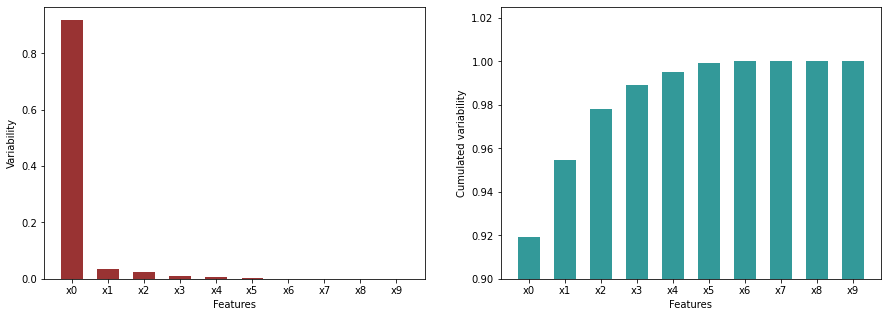

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

features3= ["x%u"%a for a in range(0,len(percentages))]

ax[0].bar(features3, percentages, color ='maroon', width = 0.6, alpha=0.8)
ax[0].set_xlabel("Features")
ax[0].set_ylabel("Variability")

ax[1].bar(features3, np.cumsum(percentages), color ='teal', width = 0.6, alpha=0.8)
ax[1].set_xlabel("Features")
ax[1].set_ylabel("Cumulated variability")
ax[1].set_ylim(0.9,1.025)


plt.show()


Most of the variability is retained in the first feature, but to retain at least the 99% of the variability 5 features has to be considered, while the other 5 can be neglected.

In [41]:
data_rotated2 = np.dot(U.T, data2) #rotates the data
print(data_rotated2)

[[-9.17912505e+01 -2.08692163e+02 -2.94894278e+02 ... -1.27981973e+02
  -2.00819003e+02 -1.77179766e+02]
 [-3.04204037e+01 -2.26679971e+01 -7.87934146e+01 ... -1.46539341e+01
  -6.22404964e+01 -3.48233970e+01]
 [ 8.70923693e+00  1.17330833e+01  9.22568236e+01 ...  8.45099436e+00
   7.82733322e+01  1.68312187e+01]
 ...
 [ 5.26202929e-01  3.32681622e-01 -7.18465132e+00 ...  5.66619390e-01
  -1.54081992e-03  2.96092598e-01]
 [-5.20196112e-02  1.63903207e-01  1.45331394e+00 ...  1.28777294e-01
  -1.15890921e-01 -1.38069004e-01]
 [ 1.70016339e-02 -6.39179518e-02  2.35171627e-02 ...  1.33925008e-02
  -3.83994578e-03  8.75080001e-03]]


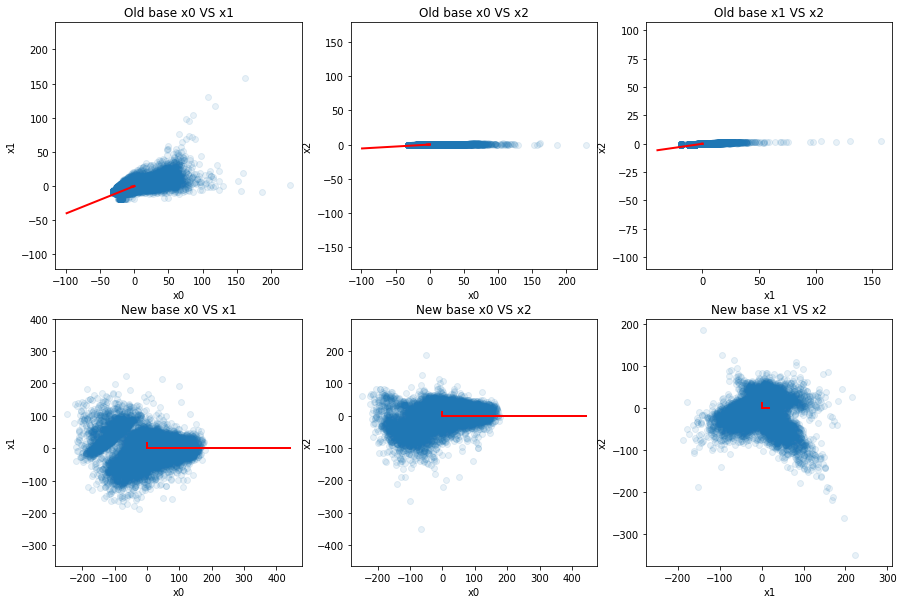

In [42]:
#PLOTs OF THE FIRST THREE FEATURES

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

def plot_graph(ax,r,c, dati, x1, x2):
    means=dati.mean(axis=1)  #compute means of the features
    ax[r,c].scatter(dati[x1]-means[x1],dati[x2]-means[x2], alpha=0.1)
    ax[r,c].set_xlabel('x'+str(x1))  
    ax[r,c].set_ylabel('x'+str(x2)) 
    
    if r==0:
        for li, vi in zip(eig[0:3], U.T[0:3]):
            ax[r,c].axis("equal")
            ax[r,c].plot([0, 0.01 * li* vi[x1]], [0, 0.01 * li*vi[x2]], 'r-', lw=2)
            ax[r,c].set_title("Old base x"+str(x1)+" VS x"+str(x2) )
        
    if r==1: 
        for li, vi in zip(eig[0:3], np.diag([1]*len(eig))[0:3]):
            ax[r,c].axis("equal")
            ax[r,c].plot([0, 0.01 * li* vi[x1]], [0, 0.01 * li*vi[x2]], 'r-', lw=2)
            ax[r,c].set_title("New base x"+str(x1)+" VS x"+str(x2) )
   
    
plot_graph(ax,0,0,data2,0,1)
plot_graph(ax,0,1,data2,0,2)
plot_graph(ax,0,2,data2,1,2)
plot_graph(ax,1,0,data_rotated2,0,1)
plot_graph(ax,1,1,data_rotated2,0,2)
plot_graph(ax,1,2,data_rotated2,1,2)